<h1>Cancer Classification</h1>

<h4>Maycon Kawlin</h4>
<h4>08/08/2023</h4>

<h2>Abstract</h2>

<p>
    This analysis is up on data colected from Kaggle repository, where we will explore the morphometric features of a cancer, witch is radius, perimeter, area, smoothness, compactness, concavity, number of concave points, symmetry and fractal dimension. This features will be related with a target feature, diagnosis, that is separeted in benign and malignant.The first thing that we gonna do is find the relation between the features and the target. After that, we will build a model to classify the cancer. If are you interest, there is an explanation about the diagnosis feature bellow.
</p>
<blockquote>
<i>
  <p>
      A benign tumor is a mass of cells (tumor) that does not invade neighboring tissue or metastasize (spread throughout the body, like malignant). Compared to malignant (cancerous) tumors, benign tumors generally have a slower growth rate. Benign tumors have relatively well differentiated cells. They are often surrounded by an outer surface (fibrous sheath of connective tissue) or stay contained within the epithelium. Common examples of benign tumors include moles and uterine fibroids.
  </p>
  <a target="blank_" href='https://en.wikipedia.org/wiki/Benign_tumor'>https://en.wikipedia.org/wiki/Benign_tumor</a>
</i>
<blockquote>

<h2>Attribute Information:</h2>
<ul>
    <li>1. id</li>
    <li>2. diagnosis (M=Malignant, B=Benign)</li>
</ul>

<h2>Morphometric Features:</h2>
<ul>
    <li>a. radius (measure from the center of the cancer util the border)</li>
    <li>b. texture (standard deviation of gray-scale values)</li>
    <li>b. perimeter (measure of a turn around of the cancer border)</li>
    <li>c. area</li>
    <li>d. smoothness mean (how much the surface is rough or smooth)</li>
    <li>e. compactness (perimeter^2 / area - 1.0)</li>
    <li>f. concavity (severity of concave points along the nuclear border)</li>
    <li>g. concave points (number of concave points along the nuclear border)</li>
    <li>h. symmetry</li>
    <li>i. fractal dimension (“coastline approximation” - 1)</li>
</ul>
<p>OBS.: Coastline approximation is a concept in fractal geometry that refers to the process of estimating the fractal dimension of a complex and irregular shape.</p>

<h2>Importing Libraries</h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

<h2>Importing the dataset</h2>

In [ ]:
data = pd.read_csv('/content/drive/Othercomputers/HP SESI/Cancer_project/data/Cancer_Data.csv').drop('Unnamed: 32',axis=1)
data.head(), len(data)

(         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  radius_worst  texture_worst  perimeter_

<h2>Statistics</h2>

<h4>Most diagnosis of cancer are Benign:</h4>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
frequency_dignosis = [len(data[data['diagnosis']=='M']), len(data[data['diagnosis']=='B'])]
frequency_dignosis

[212, 357]

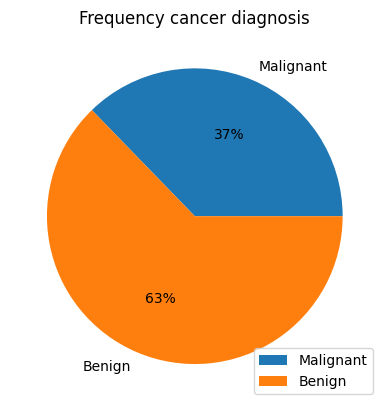

In [ ]:
plt.pie(frequency_dignosis, labels=['Malignant','Benign'], autopct='%.0f%%')
plt.legend(loc=4)
plt.title('Frequency cancer diagnosis')
plt.show()

<h4>Lets see some statistics of the dataset. First Malignant (M) and second Benign (B):</h4>

In [ ]:
data[data['diagnosis']=='M'].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [ ]:
data[data['diagnosis']=='B'].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [ ]:
data_mean = pd.concat([data[data['diagnosis']=='M'].describe().iloc[1,1:],data[data['diagnosis']=='B'].describe().iloc[1,1:]], axis=1)
data_mean['M'], data_mean['B'] = pd.DataFrame(data_mean.iloc[:,0]),pd.DataFrame(data_mean.iloc[:,1])
data_mean = data_mean.drop(['mean'],axis=1)
data_mean.head()

,M,B
radius_mean,17.462830,12.146524
texture_mean,21.604906,17.914762
perimeter_mean,115.365377,78.075406
area_mean,978.376415,462.790196
smoothness_mean,0.102898,0.092478


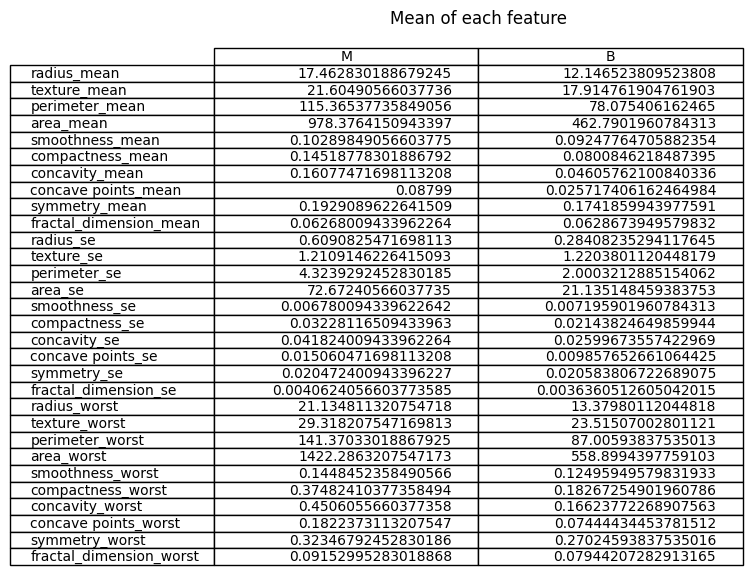

In [ ]:
from pandas.plotting import table  # EDIT: see deprecation warnings below

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(31,2,(1), frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_title('Mean of each feature')

table(ax, data_mean)  # where df is your data frame

plt.savefig('/content/drive/Othercomputers/HP SESI/Cancer_project/mean_diagnosis.pdf', bbox_inches="tight")

<p> Most of features related to Benign diagnosis has a mean value smaller. This suggests that there is a relation visible.</p>

<h3>Lets see the boxplot and density distribution of each variable in compare to diagnosis. But first, we must understand it.</h3>
<p>A boxplot, also known as a box-and-whisker plot, is a graphical representation that provides a concise summary of the distribution of a dataset. It displays key statistical measures and allows you to quickly assess the spread, central tendency, and presence of outliers within the data. A boxplot is particularly useful when you want to compare multiple datasets or analyze the distribution of a single dataset.</p>

<p>Here's how to interpret a boxplot:</p>
<ol>
<li>Box: The central rectangle of the boxplot represents the interquartile range (IQR), which is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data. The box encapsulates the middle 50% of the data, showing where the majority of the values lie. The length of the box indicates the spread or dispersion of this middle range of values.</li>

<li>Median (Q2): A vertical line or bar inside the box marks the median of the dataset. The median is the value that separates the data into two halves: half of the data points are below the median, and the other half are above it. It's a measure of central tendency that's less affected by extreme values (outliers) compared to the mean.</li>

<li>Whiskers: These are lines extending from the box, usually to the minimum and maximum values within a certain range. The length of the whiskers can vary depending on the specific method used to calculate them, but they typically extend up to a certain number of "whisker lengths" from the box (often 1.5 times the IQR). Data points outside the whiskers are considered potential outliers.</li>

<li>IQR: Stands for Interquartile Range. It is a statistical measure that represents the range between the first quartile (Q1) and the third quartile (Q3) in a dataset. Quartiles are values that divide a data
set into four equal parts, each containing 25% of the data points.(The Interquartile Range (IQR) is calculated as follows: IQR = Q3 - Q1)</li>

<li>Outliers: Individual data points that fall outside the whiskers are shown as individual points or dots. These are values that are unusually far from the rest of the data and might be worth investigating further.</li>
</ol>

In [ ]:
import seaborn as sns

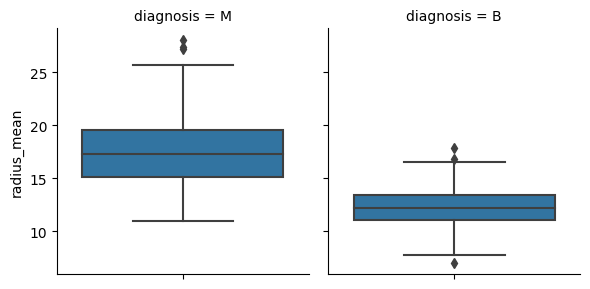

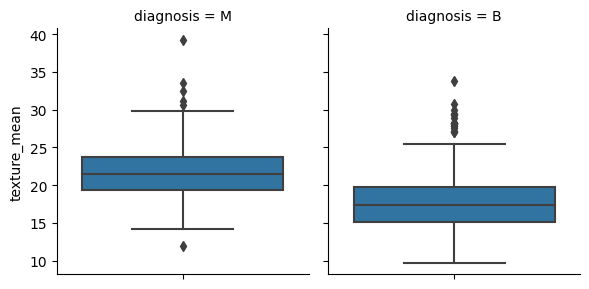

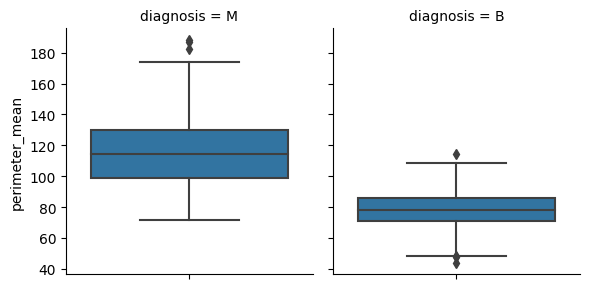

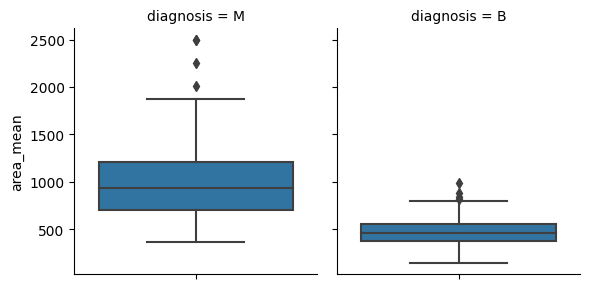

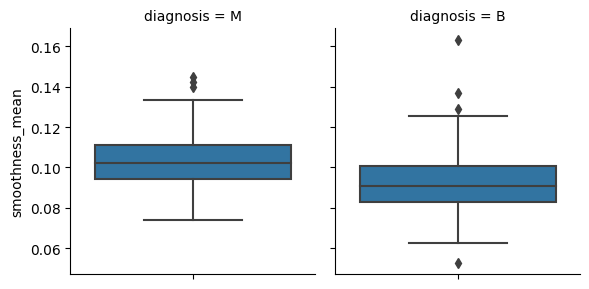

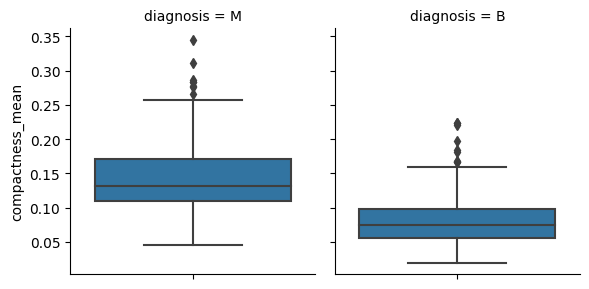

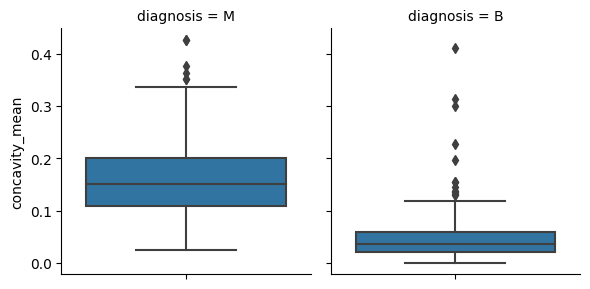

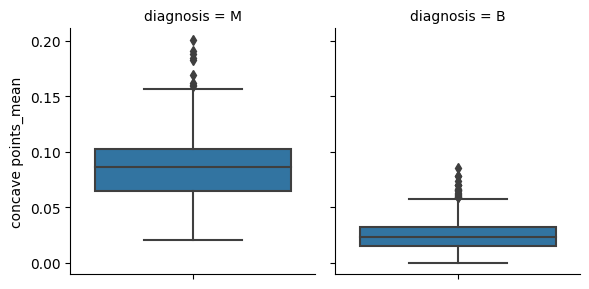

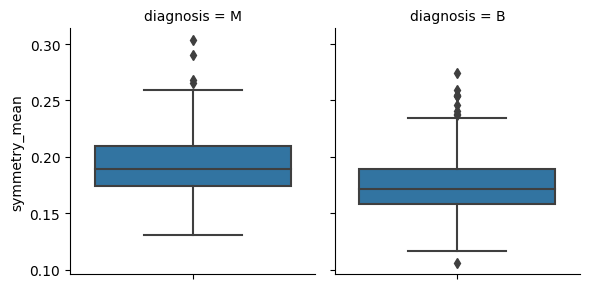

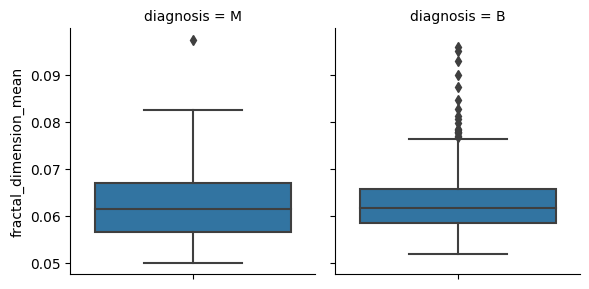

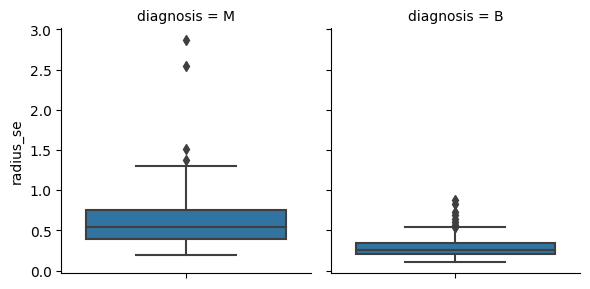

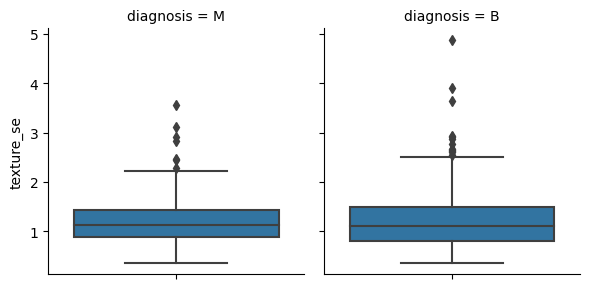

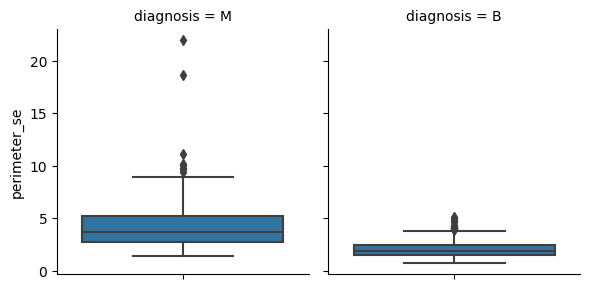

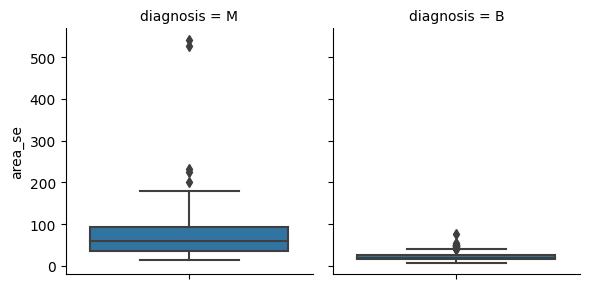

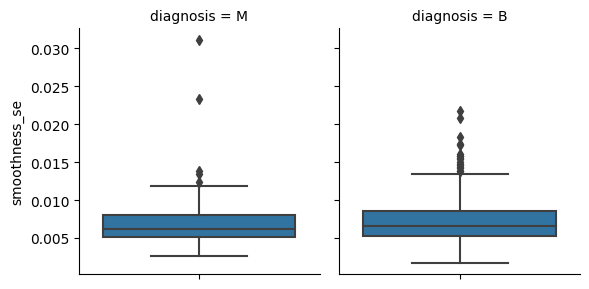

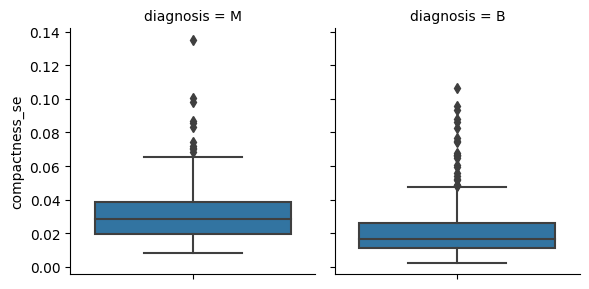

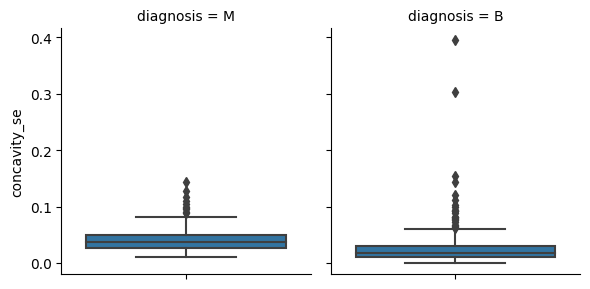

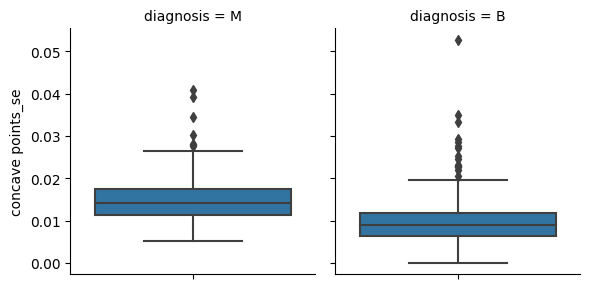

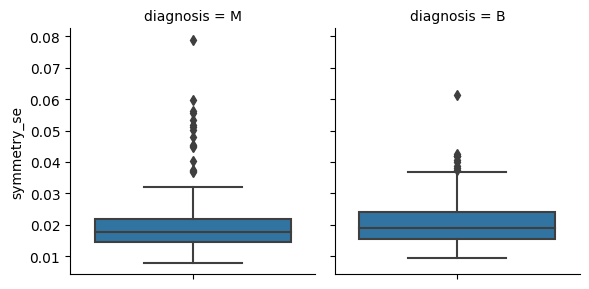

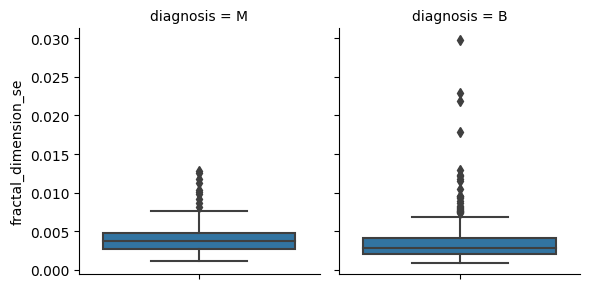

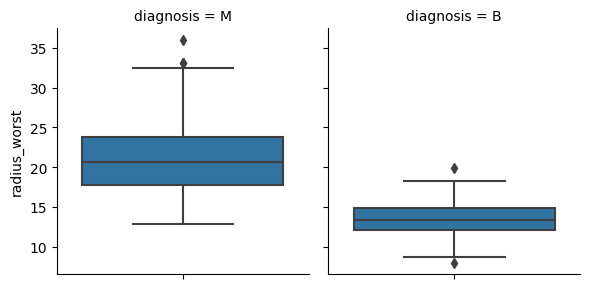

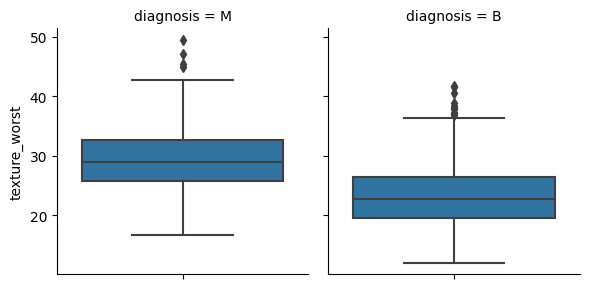

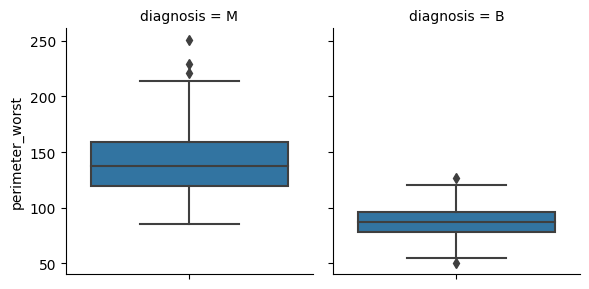

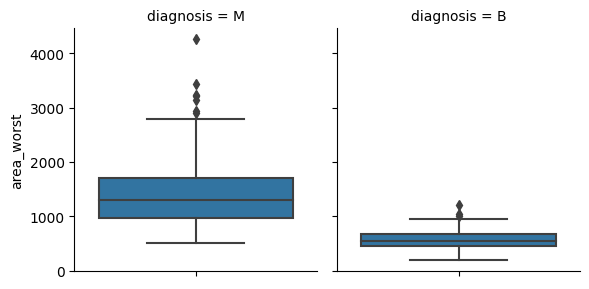

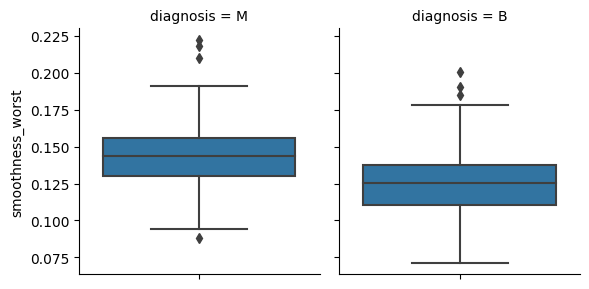

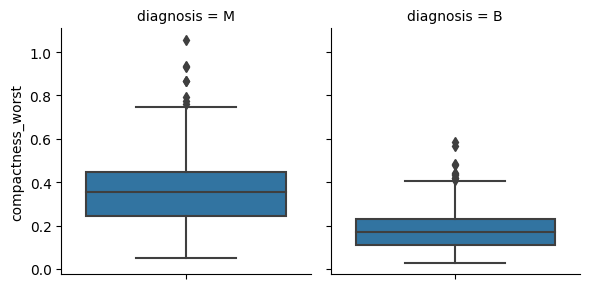

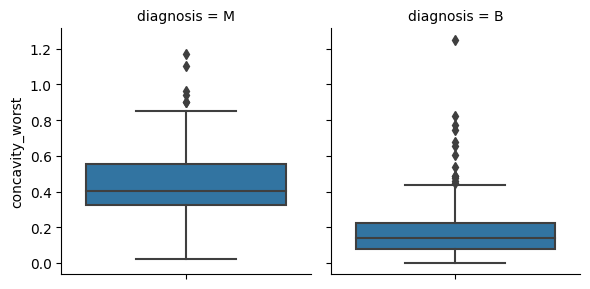

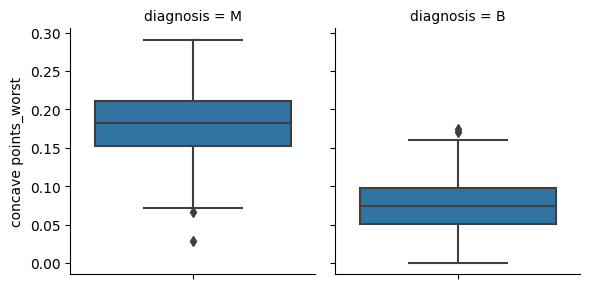

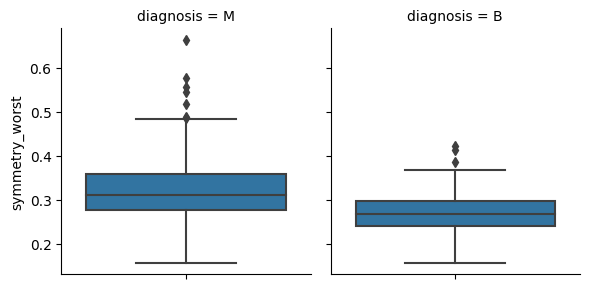

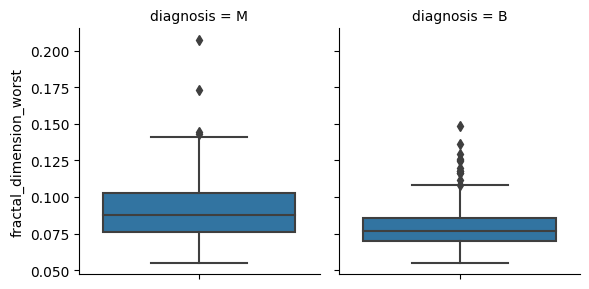

In [ ]:
columns = data.columns
for feature in list(columns[2:]):
  sea = sns.FacetGrid(data[1:], col = 'diagnosis')
  sea.map_dataframe(sns.boxplot, y=feature)

<h3>Now, let's take a look at the density distribution graph – it's like the sidekick to the boxplot graph. While the boxplot is your go-to for spotting outliers in a snap, the density distribution graph is all about helping you catch the finer details of how the data is spread out. Time to dive!</h3>
<p>A density distribution graph, often referred to as a probability density plot or simply a density plot, is a graphical representation that provides insights into the distribution of data points in a dataset. It is particularly useful for visualizing continuous data, such as measurements on a scale, and it offers a smooth representation of the underlying data distribution.</p>

<p>Here's how to interpret a density distribution graph:</p>
<ol>
<li>Y-Axis: The vertical axis represents the density or probability density of the data. This is a measure of how densely the data points are distributed along the range of values. The higher the density at a certain point, the more data points are present in that vicinity.</li>

<li>X-Axis: The horizontal axis represents the values of the variable you are measuring. It's the range of possible data values, and it's divided into intervals or bins.</li>

<li>Smooth Curve: In a density distribution graph, you'll see a smooth curve that traces the shape of the data distribution. This curve represents the estimated probability density function of the data. It helps you visualize the general pattern and shape of the distribution.</li>

<li>Area Under the Curve: The area under the curve in any interval corresponds to the relative likelihood of observing data points within that interval. Integrating the entire curve over its range gives a total probability of 1, meaning the probability that a data point falls within the entire range of possible values is 100%.</li>

<li>Peaks and Valleys: Peaks in the curve indicate regions where the data is most concentrated, while valleys represent regions with fewer data points. The shape of the curve gives insights into the skewness (asymmetry) and kurtosis (tails) of the distribution.</li>
</ol>

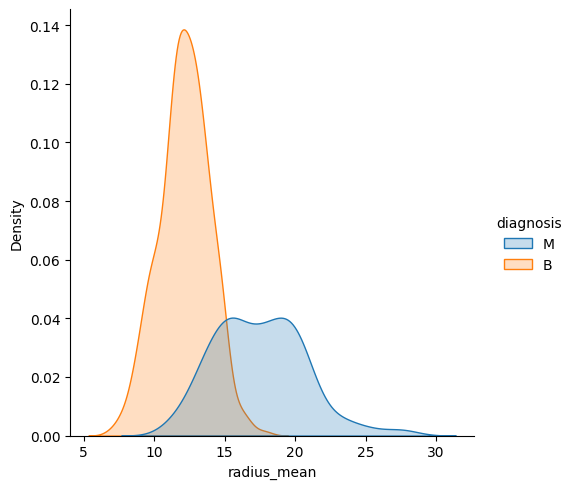

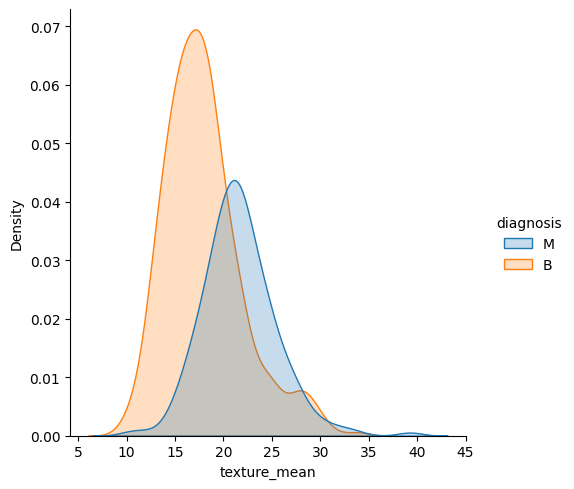

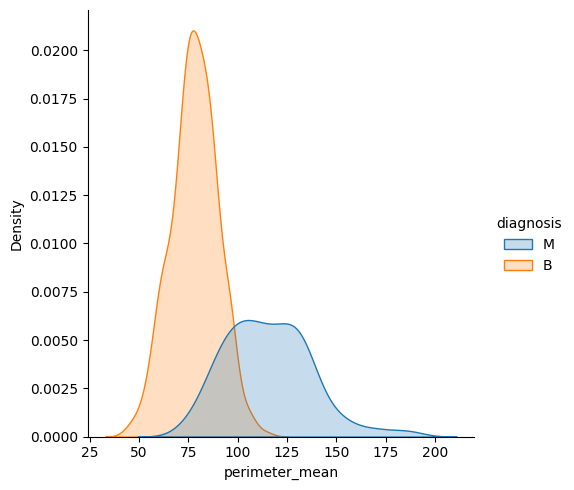

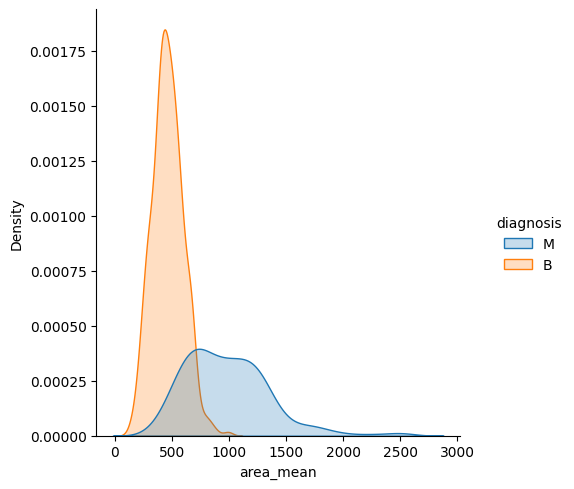

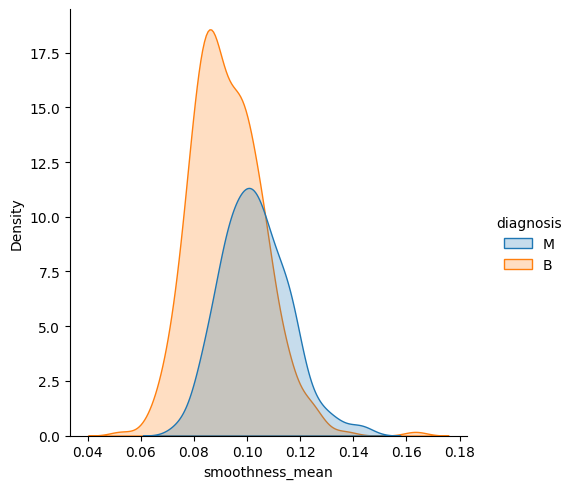

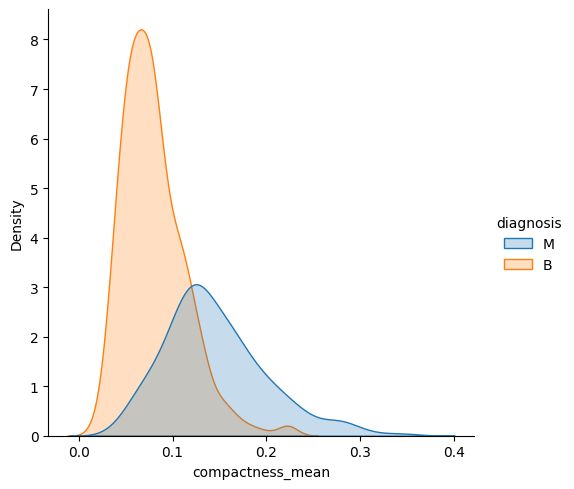

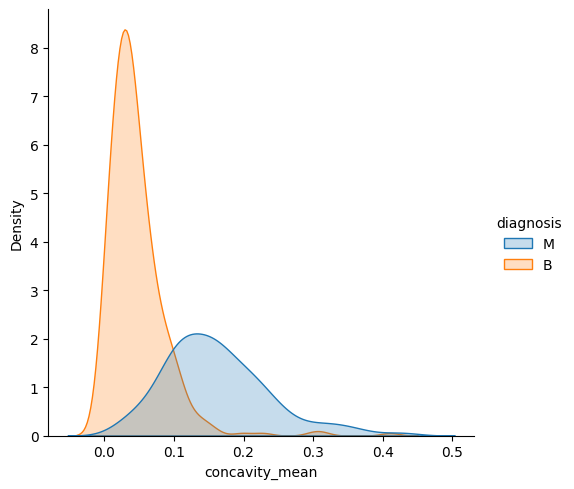

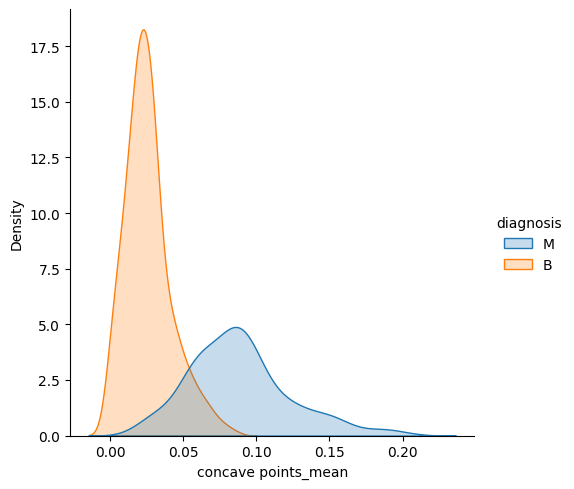

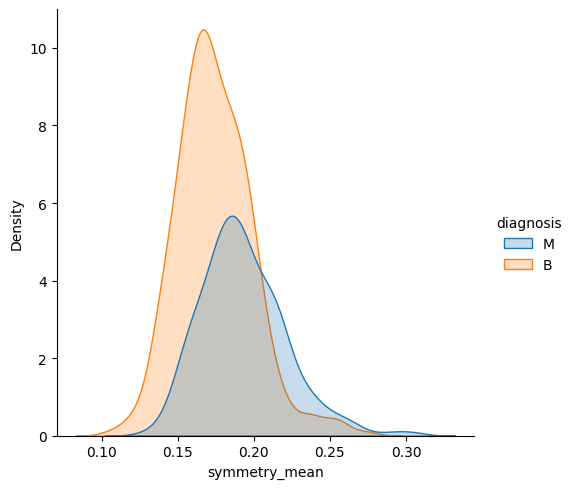

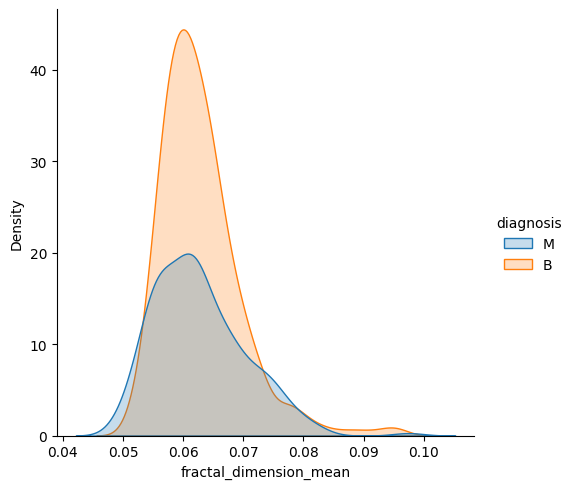

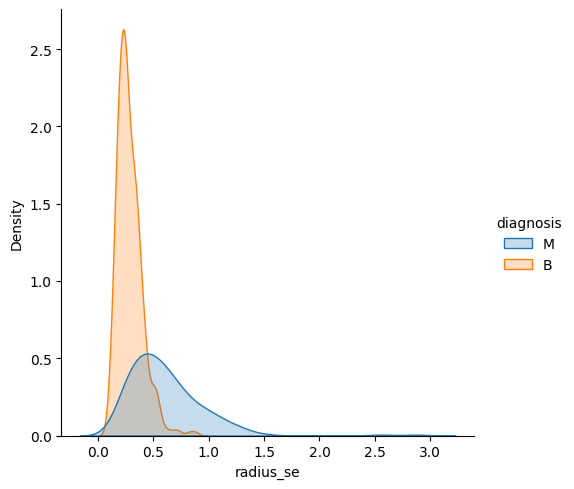

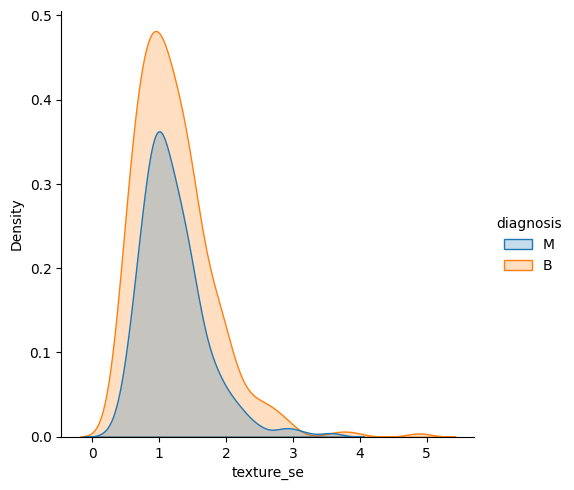

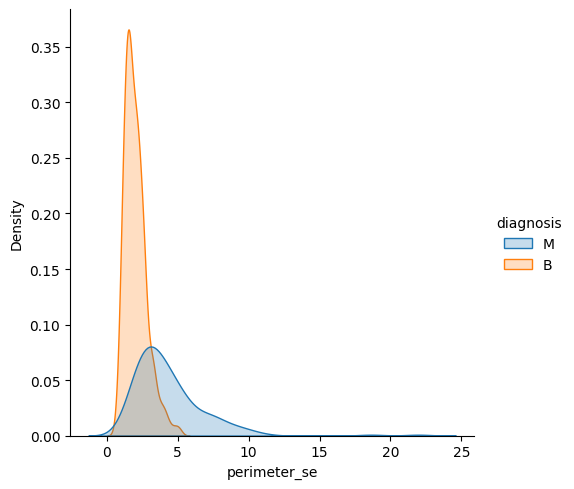

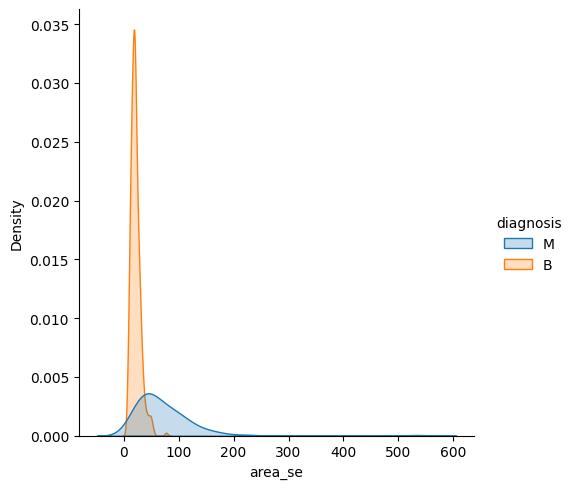

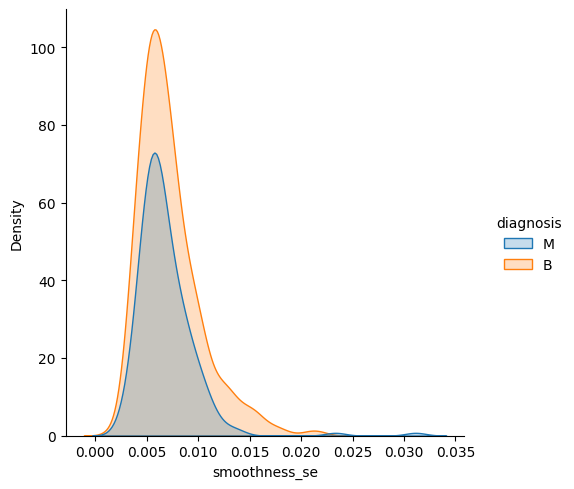

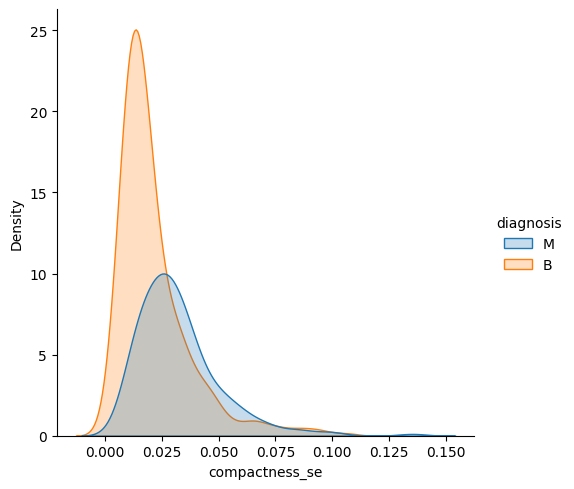

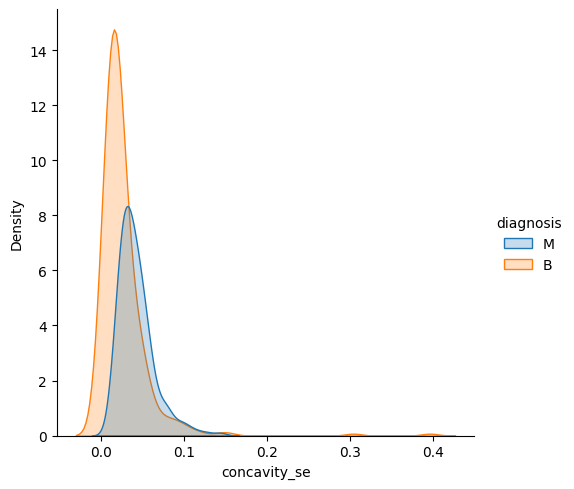

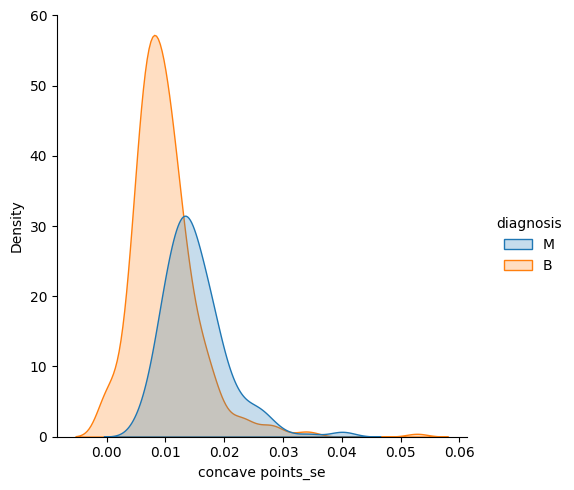

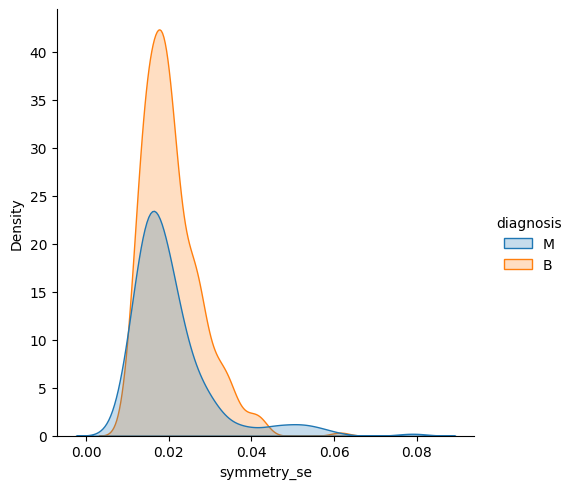

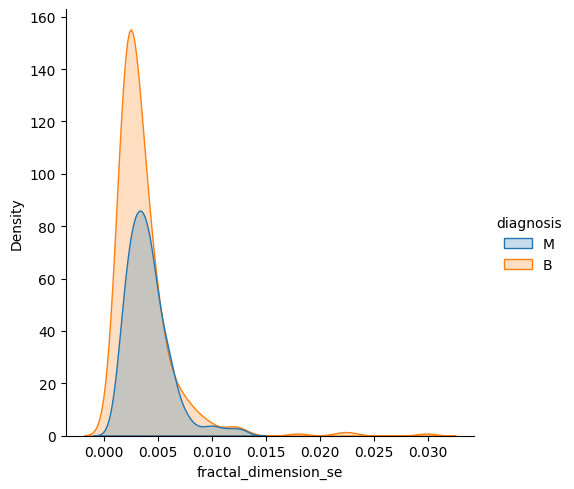

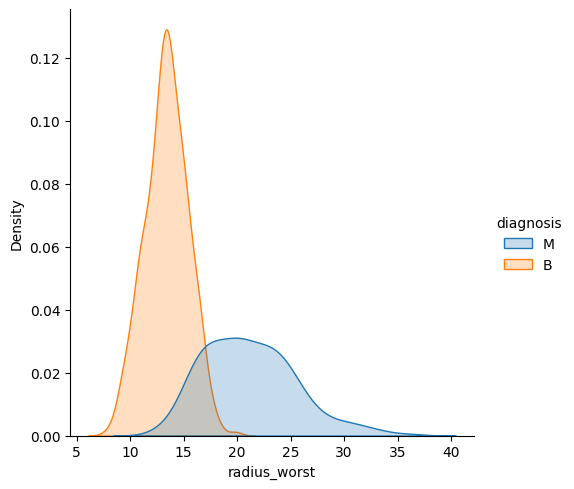

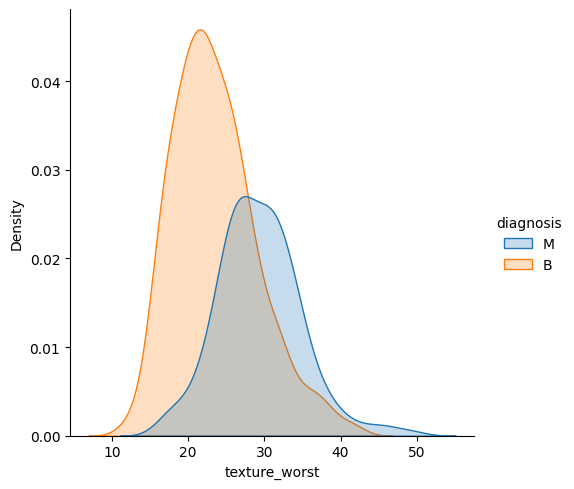

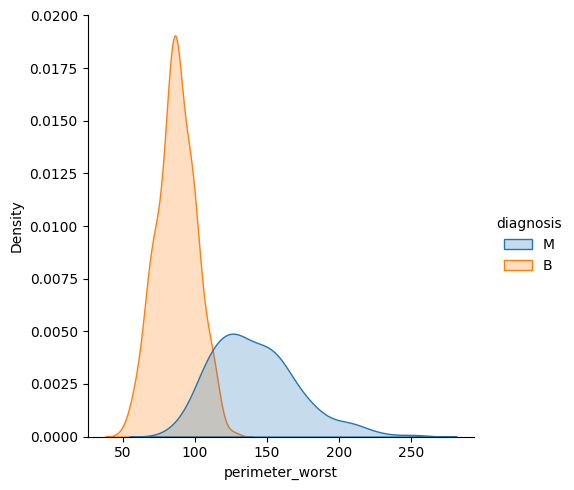

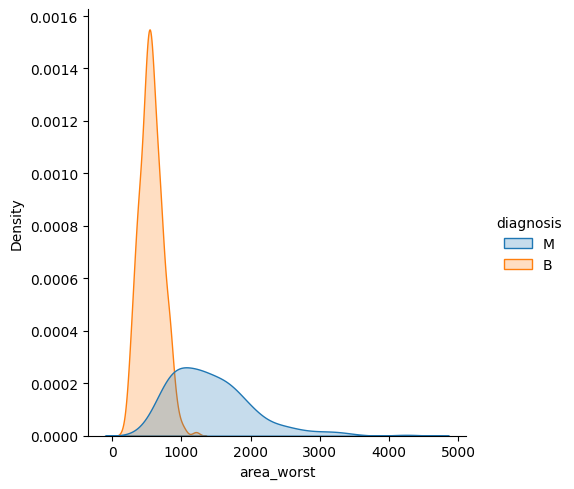

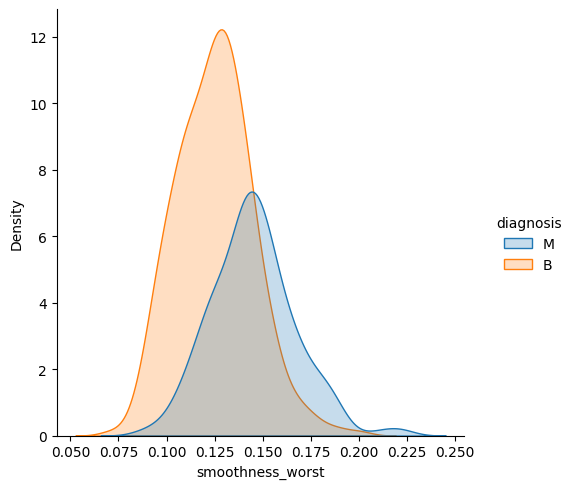

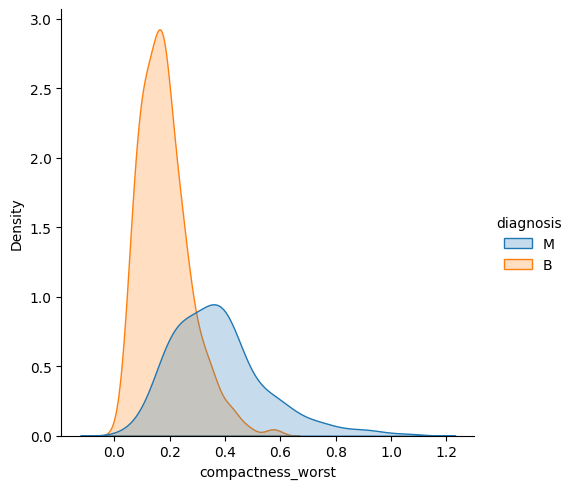

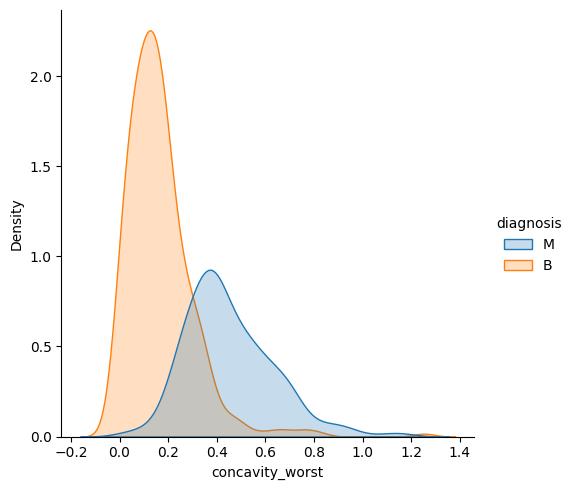

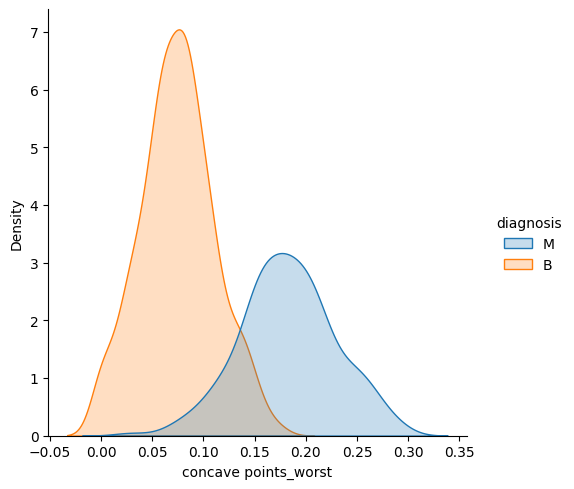

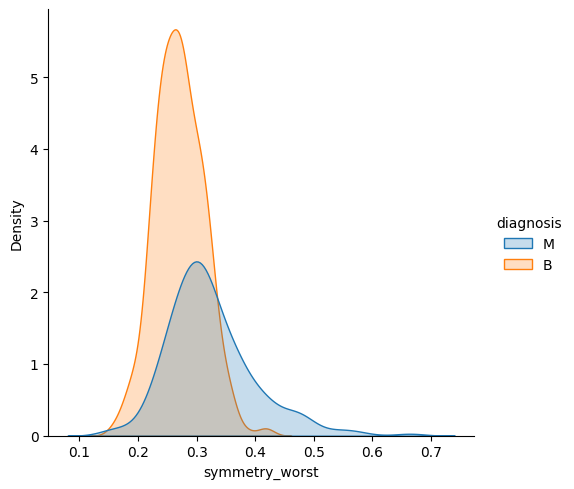

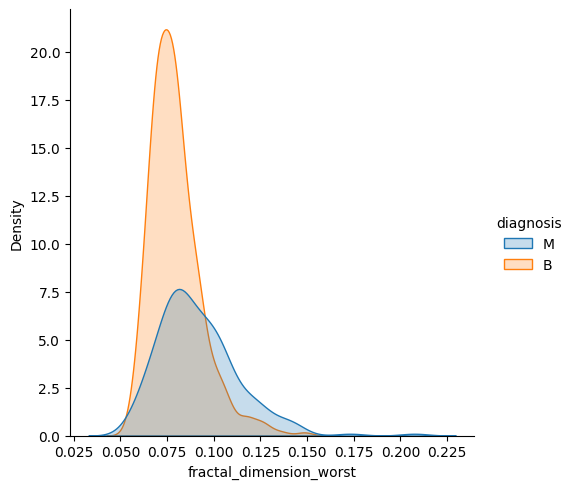

In [ ]:
for feature in list(columns[2:]):
  sns.displot(data, x=feature, hue="diagnosis", kind="kde", fill=True)

<p>In the boxplot graph we can see the difference between the two classes of diagnosis, and in the most features the mean value of malignant cancers are higher than the benign cancers. This is complemented by the density distribution graph, wich allows us to see that some features are the same independtly of the class of cancer. Now, lets take a look in t-test for two samples to verify if the means are significantly differents.</p>
<p>The t-test is a statistical method used to compare the means of two groups and determine if there's a significant difference between them. It helps you understand whether the observed differences in the means are likely due to genuine variations in the populations being studied, or if they could have occurred by random chance.</p>

<h2> T-statistic</h2>
<h4>Lets understand some terminologies:</h4>
<ul>
  <li>
    HYPOTHESIS TESTING - The objective of hypothesis testing is to evaluate the evidence provided by the sample data to decide whether to reject the null hypothesis in favor of the alternative hypothesis. The decision is guided by statistical analysis, particularly by calculating a test statistic that measures how much the sample data deviates from what would be expected under the assumption of the null hypothesis.
    <ol>
      <li>Null Hypothesis (H0): This is the default assumption or statement of no effect, no difference, or no relationship. It represents the status quo and suggests that any observed differences or effects are due to random chance. In our case, no difference in the means of features.</li>
      <li>Alternative Hypothesis (H1 or Ha): This is the statement that contradicts the null hypothesis. It suggests that there is a specific effect, difference, or relationship in the population that is being studied.</li>
    </ol>
  </li>
  <li>SIGNIFICANCE LEVEL - Choosing a Significance Level (α), This represents the threshold for deciding whether to reject the null hypothesis. Common values for α are 0.05 or 0.01, wich we choose 0.05.</li>
  <li> P-Value - The p-value is the probability of observing results as extreme as or more extreme than the ones obtained, assuming the null hypothesis is true. If higher than the significance level we accept the null hypothesi. </li>
  <li>STATISTICAL SIGNIFICANCE - Refers to the likelihood that the results observed in a study or experiment are not simply due to random chance. In other words, when an observed effect or difference between groups is deemed statistically significant, it means that the evidence suggests the effect is real and not just a result of random variability in the data.</li>
  <li>T-Value - The t-statistic essentially tells you how many standard errors the sample mean is away from the hypothesized population mean. If the t-statistic is large, it suggests that the sample mean is significantly different from the hypothesized mean, and this might indicate a real effect or difference. Conversely, if the t-statistic is small, it suggests that the difference between the sample mean and the hypothesized mean could likely have occurred due to random chance.</li>
</ul>
<p> We'll use stats from scipy to make the test</p>

In [ ]:
from scipy import stats

In [ ]:
statistics = []
for feature in list(columns[2:]):
  t_stat, p_val = stats.ttest_ind(data[data['diagnosis']=='M'][feature], data[data['diagnosis']=='B'][feature])
  statistics.append([t_stat, p_val, feature])
statistics

[[25.435821610057054, 8.465940572262422e-96, 'radius_mean'],
 [10.86720108146434, 4.0586360478980736e-25, 'texture_mean'],
 [26.405212979192665, 8.43625103617473e-101, 'perimeter_mean'],
 [23.938687235690992, 4.734564310307344e-88, 'area_mean'],
 [9.146098808149038, 1.0518503592032013e-18, 'smoothness_mean'],
 [17.69839197688993, 3.9382631058873895e-56, 'compactness_mean'],
 [23.103963430622642, 9.966555755072963e-84, 'concavity_mean'],
 [29.354318592113618, 7.101150161057422e-116, 'concave points_mean'],
 [8.338311789592808, 5.733384028466827e-16, 'symmetry_mean'],
 [-0.30571112978583087, 0.7599368037256238, 'fractal_dimension_mean'],
 [16.39635102598575, 9.73894865646109e-50, 'radius_se'],
 [-0.1977238031013334, 0.8433320287670163, 'texture_se'],
 [15.934158019257902, 1.6519051758498057e-47, 'perimeter_se'],
 [15.609342900255001, 5.8955213926058635e-46, 'area_se'],
 [-1.599364812413284, 0.11029660865789295, 'smoothness_se'],
 [7.297077437448529, 9.975994654074766e-13, 'compactness_se

<p>The first value indicate the t-value, the second one indicates the p-value and the third one is the feature in question. We must calculate the critical value to see if the t-value is higher or smaller.</p>

In [ ]:
critical_value = stats.t.ppf(1 - 0.05/2, len(data))
critical_value

1.9641419100017135

<p>If the T-Value is greater than the critical value (1.96) there are  significantly difference, and if the p-value is less than 0.05 (significance level) the observed differences or effects are not due to random chance and we reject the null hypothesis (no difference between the feature means). For the features show bellow we can reject the null hypothesi and take the assumption that there is no difference compared to diagnosis class.</p>

In [ ]:
rejected_features = []
for i in range(len(statistics)):
  if float(np.array(statistics[i])[1]) >= 0.05 and float(np.array(statistics[i])[0]) <= critical_value:
    rejected_features.append(np.array(statistics[i])[-1])
rejected_features

['fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se']

<h2>Correlation Between Features</h2>
<p>We'll look for correlation between the features and plot some scatter graphs.</p>

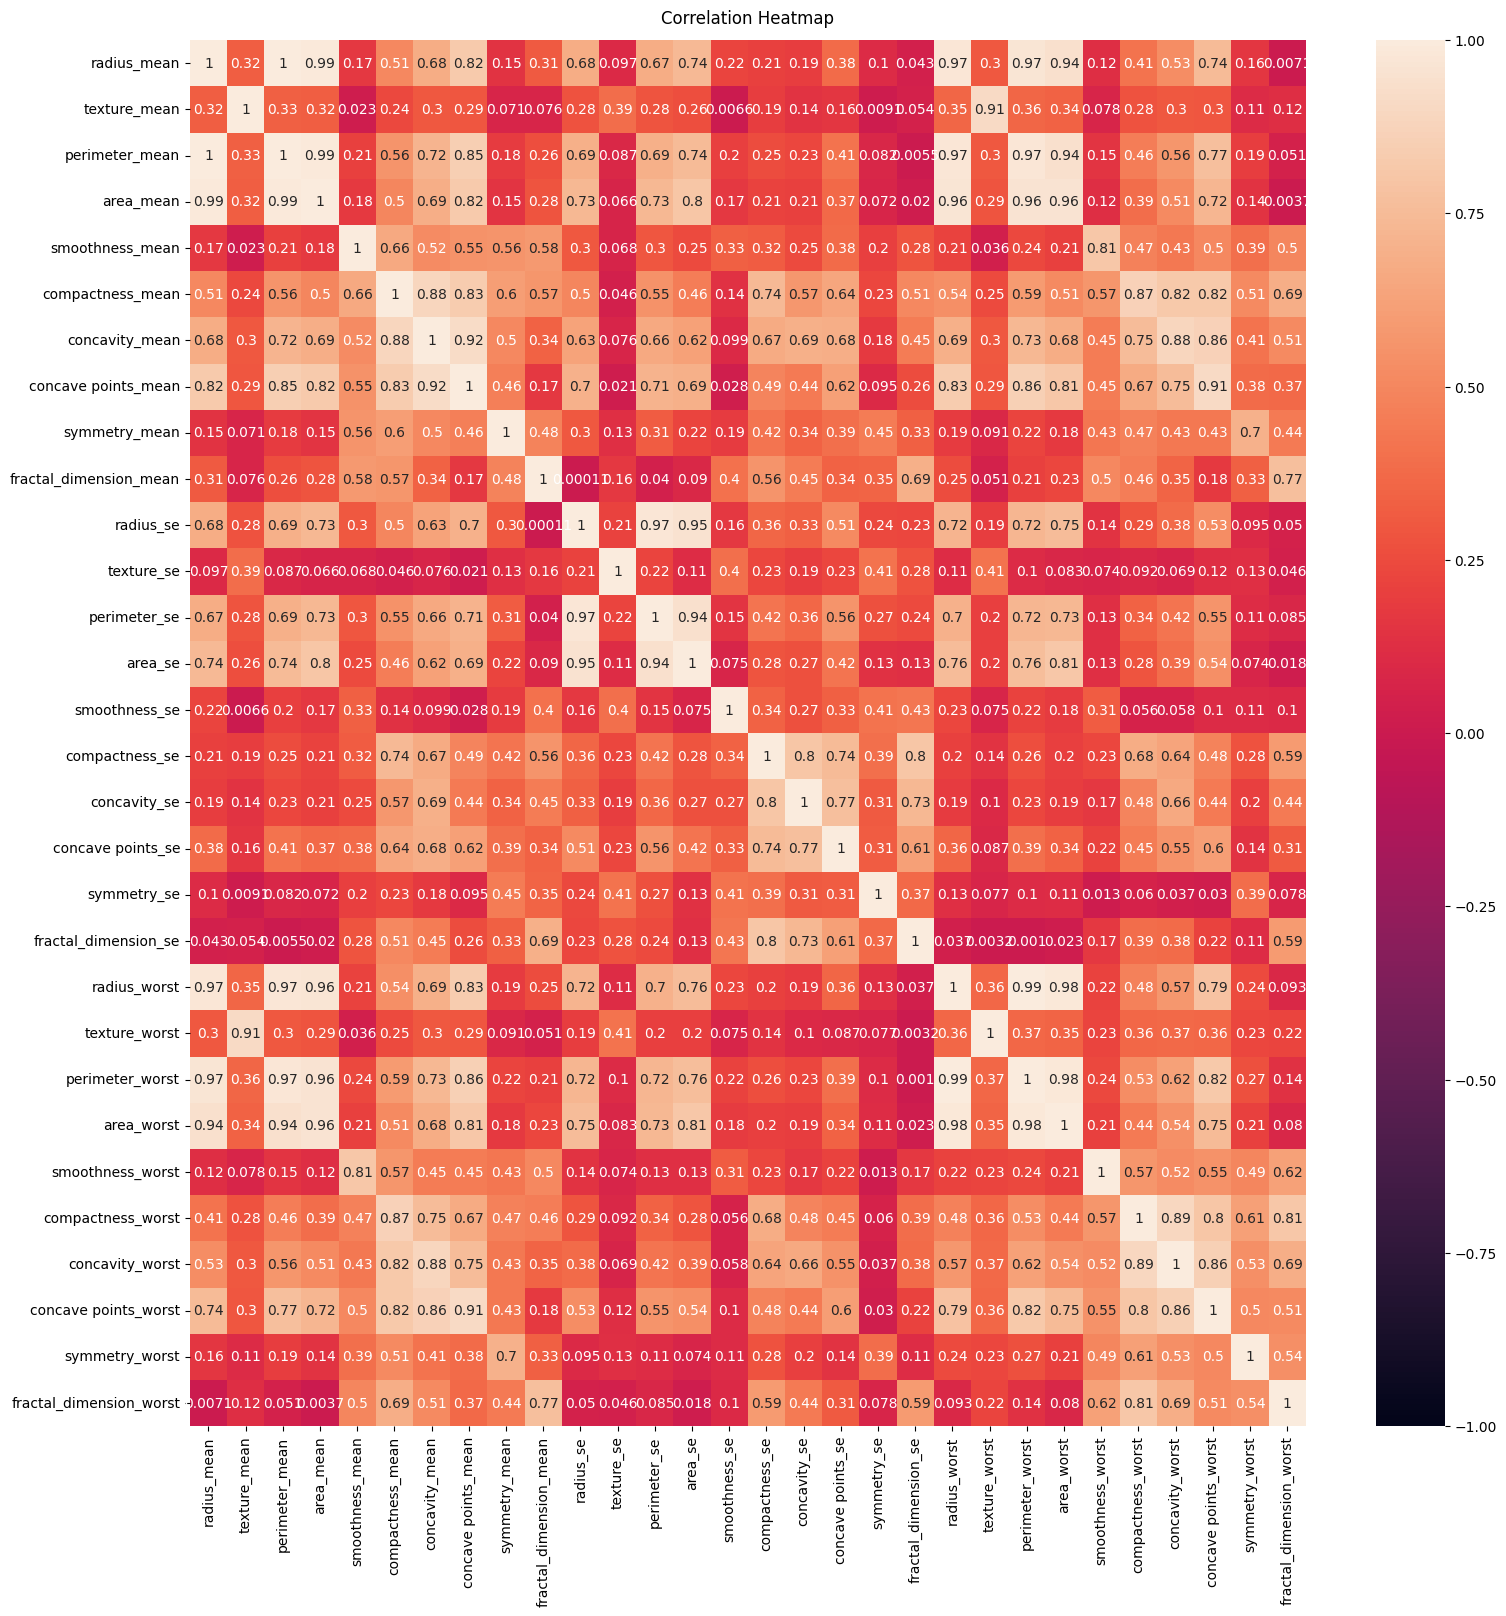

In [ ]:
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(data.iloc[:,1:].corr().abs(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('/content/drive/Othercomputers/HP SESI/Cancer_project/correlation.png')

<h4>The most correlated features are:</h4>

<ol>
<li><p>radius_mean - perimeter_mean, area_mean, concave_points</p></li>
<li><p>compacteness - concavity_mean, concave_points</p></li>
</ol>

<h4>Now we will make a scatter plot to se the relation between them and at the same time separate by diagnosis classes:</h4>

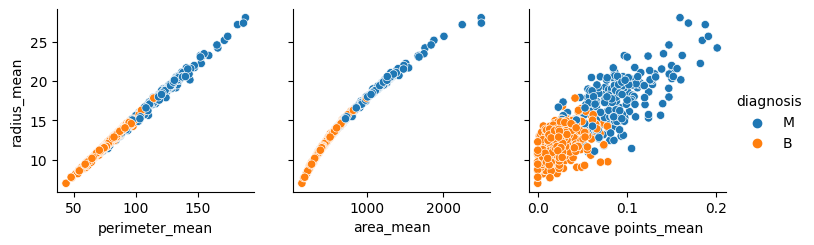

In [ ]:
x_vars = ['perimeter_mean','area_mean','concave points_mean']
y_vars = ["radius_mean"]
g = sns.PairGrid(data.iloc[:,1:], hue="diagnosis", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.savefig('/content/drive/Othercomputers/HP SESI/Cancer_project/correlated_features_1.png')

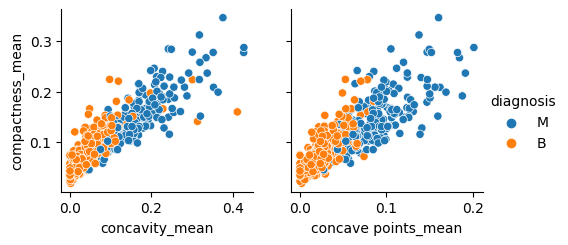

In [ ]:
x_vars = ['concavity_mean','concave points_mean']
y_vars = ["compactness_mean"]
g = sns.PairGrid(data.iloc[:,1:], hue="diagnosis", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.savefig('/content/drive/Othercomputers/HP SESI/Cancer_project/correlated_features_2.png')

<p>We can see clearly that there is a vertical line in each graph that separates the class diagnosis. The information that we can get from it is, the higher the radius, perimeter, area, compactness, concavity and number of concave points, more likely to be a malignant tumor.</p>

<h2>Preprocessing</h2>

In [ ]:
data_copy = data.copy().drop(['id','fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'],axis=1)
data_copy.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_copy_dummies = pd.concat((pd.get_dummies(data_copy['diagnosis']), data_copy),axis=1).drop('diagnosis', axis=1)
data_copy_dummies = data_copy_dummies.drop('B',axis=1).rename(columns={'M':'diagnosis'})
data_copy_dummies.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3>New class:</h3>
<p>'M' => 1</p>
<p>'B' => 0</p>

In [ ]:
data_copy_dummies['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
X = data_copy_dummies.drop(['diagnosis'], axis=1)
y = data_copy_dummies['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((455, 25), (114, 25))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

<h2>Building the model<h2>
<p>We must choose the model for our binary classification of continuous features. Here are some models proper for:</p>
  <ul>
    <li><strong>Logistic Regression</strong></li>
    <li><strong>Support Vector Machine (SVM)</strong></li>
    <li><strong>Decision Trees</strong></li>
    <li><strong>Random Forest</strong></li>
    <li><strong>Gradient Boosting</strong></li>
    <li><strong>Neural Networks</strong></li>
    <li><strong>K-Nearest Neighbors (KNN)</strong></li>
    <li><strong>Naive Bayes</strong></li>
  </ul>
<p>To this project we will choose, arbitrarily, SVM. A Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used primarily for classification and regression tasks. It's particularly effective in scenarios where the data is not linearly separable, which means the classes cannot be separated by a straight line (in 2D) or a hyperplane (in higher dimensions). SVMs address this challenge by finding the best possible hyperplane that separates the classes while maximizing the margin between the classes.</p>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
hyperparameters = {
    "kernel": ["linear","poly", "rbf", "sigmoid"],
    "c": [1.0,100.0,1000.0]
}
for kernel in hyperparameters['kernel']:
  for c in hyperparameters['c']:
    svc=SVC(kernel = kernel, C=c)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print(f'Model accuracy score with kernel {kernel} and C={c}:{accuracy_score(y_test, y_pred)}')

Model accuracy score with kernel linear and C=1.0:0.9736842105263158
Model accuracy score with kernel linear and C=100.0:0.9736842105263158
Model accuracy score with kernel linear and C=1000.0:0.9736842105263158
Model accuracy score with kernel poly and C=1.0:0.9035087719298246
Model accuracy score with kernel poly and C=100.0:0.9912280701754386
Model accuracy score with kernel poly and C=1000.0:0.9649122807017544
Model accuracy score with kernel rbf and C=1.0:0.9649122807017544
Model accuracy score with kernel rbf and C=100.0:0.9736842105263158
Model accuracy score with kernel rbf and C=1000.0:0.956140350877193
Model accuracy score with kernel sigmoid and C=1.0:0.9473684210526315
Model accuracy score with kernel sigmoid and C=100.0:0.8771929824561403
Model accuracy score with kernel sigmoid and C=1000.0:0.8771929824561403


<p>Here we done a grid search optmization method to find the best combination of hyperparameters for a given model. Hyperparameters are values that are set before training a machine learning model and cannot be learned from the data like regular model parameters. They significantly influence the performance and behavior of the model. Grid search involves systematically trying out different combinations of hyperparameters from a predefined set to determine which combination results in the best performance.</p>
<p> In our case, the hyperparameters are the kernel method and the C parameter. Kernel. Accoding to <a target="blank_" href="https://www.kaggle.com/code/prashant111/svm-classifier-tutorial">svm-classifier-tutorial</a>, while kernel is defined as</p>

<blockquote>
    <i>"just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space."</i>
</blockquote>
<p>the C parameter is described as</p>
<blockquote>
    <i>"C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers."</i>
</blockquote>
<p>However, keep in mind that setting C too high can lead to overfitting, while setting it too low can result in underfitting. Therefore, it's important to perform hyperparameter tuning, such as through grid search or other optimization techniques.
</p>

In [ ]:
svc=SVC(kernel = 'poly', C=100)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(f'Model accuracy score with kernel poly and C=100:{accuracy_score(y_test, y_pred)}')

Model accuracy score with kernel poly and C=100:0.9912280701754386


The model choosed is with polynomial kernel and a C parameter of 100. Now we need to know the training score accuracy to see if happend a overfitting.

In [ ]:
y_pred_train = svc.predict(X_train)
print(f'Training-set accuracy score:{accuracy_score(y_train, y_pred_train)}')

Training-set accuracy score:0.9912087912087912


<p>Once the train accuracy (0.991208) is equal to the test accuracy (0.991228), the model is not overfitting. Now, we have to calculate the null accuracy to evaluate the test predictions.</p>

In [ ]:
y_test.value_counts()

0    67
1    47
Name: diagnosis, dtype: int64

In [ ]:
null_accuracy = (67/(67+47))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5877


<p>In general, if your classification model's accuracy is not significantly better than the null accuracy, it indicates that your model might not be providing meaningful predictions or insights. Here we got a null accuracy (0.58) lower comparing to our model's accuracy (0.99). Another way to see how well the model done is using the confusion matrix that breaking down the predictions into different categories based on their actual and predicted classes. Here's what each of these terms means:</p>

<ol>

<li>True Positive (TP): This is the number of instances that were actually positive (belonging to the positive class), and the model correctly predicted them as positive.</li>

<li>False Positive (FP): This is the number of instances that were actually negative, but the model incorrectly predicted them as positive.</li>

<li>True Negative (TN): This is the number of instances that were actually negative, and the model correctly predicted them as negative.</li>

<li>False Negative (FN): This is the number of instances that were actually positive, but the model incorrectly predicted them as negative.</li>

</ol>

<blockquote>
  <table>
    <tr>
      <th></th>
      <th>Predicted Positive</th>
      <th>Predicted Negative</th>
    </tr>
    <tr>
      <th>Actual Positive</th>
      <td>True Positive (TP)</td>
      <td>False Negative (FN)</td>
    </tr>
    <tr>
      <th>Actual Negative</th>
      <td>False Positive (FP)</td>
      <td>True Negative (TN)</td>
    </tr>
  </table>
</blockquote>

<Axes: >

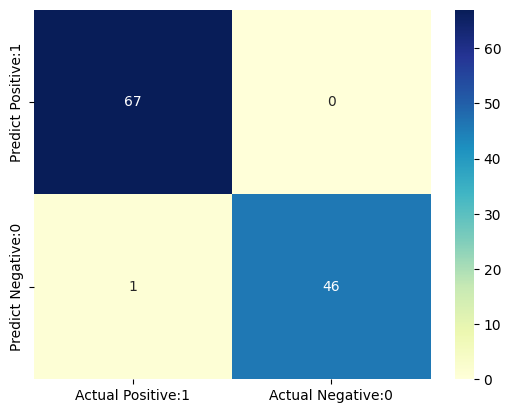

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<p>Merely a single error present, signifying a favorable model performance. Now, let us proceed to explore additional metrics to further evaluate the model's efficacy. But first, we must understand it.</p>
<ol>
<li>Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of how many of the predicted positive instances are actually positive. Mathematically, precision is calculated as:

Precision = True Positives / (True Positives + False Positives)</li>

<li>Recall (Sensitivity or True Positive Rate): Recall is the ratio of correctly predicted positive observations to the total actual positives. It is a measure of how many of the actual positive instances were correctly predicted by the model. Mathematically, recall is calculated as:

Recall = True Positives / (True Positives + False Negatives)</li>

<li>F1-Score: The F1-score is the harmonic mean of precision and recall. It takes both false positives and false negatives into account, making it a useful metric for balancing precision and recall. Mathematically, the F1-score is calculated as:

F1-Score = 2 * (Precision * Recall) / (Precision + Recall)</li>

<li>Support: Support is the number of actual occurrences of each class in the dataset. It provides insight into the imbalance of classes in the dataset and can help in understanding the significance of metrics for each class.</li>

<li>Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. While accuracy is a commonly used metric, it might not be appropriate for imbalanced datasets, where one class significantly outnumbers the others.</li>

<li>Macro Average: The macro average takes the average of the metrics across all classes without considering class imbalance. Each class contributes equally to this average.</li>

<li>Weighted Average: The weighted average takes the average of the metrics across all classes, but the contribution of each class is weighted by its support. This is useful when dealing with imbalanced datasets.</li>

</ol>

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9894


In [ ]:
from sklearn.model_selection import KFold, cross_val_score


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


svc=SVC(kernel='poly')


polynomial_scores = cross_val_score(svc, X, y, cv=kfold)

print('Stratified cross-validation scores with polynomial kernel:\n\n{}'.format(polynomial_scores))
print('Average stratified cross-validation score with polynomial kernel:{:.4f}'.format(polynomial_scores.mean()))

Stratified cross-validation scores with polynomial kernel:

[0.9122807  0.92982456 0.86842105 0.90350877 0.92920354]
Average stratified cross-validation score with polynomial kernel:0.9086


In [ ]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)


svc=SVC(kernel='poly')


polynomial_scores = cross_val_score(svc, X_train, y_train, cv=kfold)

print('Stratified cross-validation scores with polynomial kernel:\n\n{}'.format(polynomial_scores))
print('Average stratified cross-validation score with polynomial kernel:{:.4f}'.format(polynomial_scores.mean()))

Stratified cross-validation scores with polynomial kernel:

[0.9010989  0.93406593 0.86813187 0.89010989 0.89010989]
Average stratified cross-validation score with polynomial kernel:0.8967


<p>All the scores shows that our model is good. You can understand about the metrics used here, watching <a target="blank_" href="https://www.youtube.com/watch?v=4jRBRDbJemM">ROC and AUC</a> or <a target="blank_" href="https://www.youtube.com/watch?v=XiUlqN1Ay0U&t=555s">Classification report</a></p>

<h2>Results and Conclusions</h2>
<ol>
  <li>There are ouotliers in the dataset. So we did a gread search to handle for different values of parameter C. Most of tests show a C=100 to get better performances.</li>
  <li>We get better results with polynomial kernel followed by an accuracy of 0.9912.</li>
  <li>We have an imbalanced dataset. So we make the confusion matrix to see others metrics like f1-score, wich values next to 1 means a good performance (our was 0.99).</li>
  <li>with such a great metrics, we do not need to make another evaluations using methods like ROC/AUC or cross-validation.</li>
</ol>

<h2>References:</h2>
<ul>
  <li>
    <a target=''_blank href="https://www.rpubs.com/dhiv_r/breast_cancer_analysis">breast_cancer_analysis</a>
  </li>
  <li>
    <a target='_blank' href='https://rpubs.com/Yael_K/329390'>Yael_K/329390</a>
  </li>
  <li>
    <a target='_blank' href='https://rpubs.com/Kevin_Nguyen_Tran/662211'>Kevin_Nguyen_Tran/662211</a>
  </li>
  <li>
    <a target="blank_" href="https://www.kaggle.com/code/prashant111/svm-classifier-tutorial">svm-classifier-tutorial</a>
  </li>
  <li>
    <a target="blank_" href="https://www.youtube.com/watch?v=XiUlqN1Ay0U&t=555s">Classification report</a>
  </li>
  <li>
    <a target="blank_" href="https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/density-curves/v/density-curves">Density graph distribuiton</a>
  </li>
  <li>
    <a target="blank_" href="https://www.youtube.com/watch?v=x1fIDZecJdw">Boxplot graph</a>
  </li>
  <li>
    <a target="blank_" href="https://en.wikipedia.org/wiki/Benign_tumor">Benign_tumor</a>
  </li>
</ul>